# DATA COLLECTION

In [1]:
import pandas as pd
dataset = pd.read_csv("ecommerceDataset.csv")

In [2]:
dataset.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2.294360e+18,1.515970e+18,2.268110e+18,electronics.tablet,samsung,162.01,1.515920e+18
1,2020-04-24 11:50:39 UTC,2.294360e+18,1.515970e+18,2.268110e+18,electronics.tablet,samsung,162.01,1.515920e+18
2,2020-04-24 14:37:43 UTC,2.294440e+18,2.273950e+18,2.268110e+18,electronics.audio.headphone,huawei,77.52,1.515920e+18
3,2020-04-24 14:37:43 UTC,2.294440e+18,2.273950e+18,2.268110e+18,electronics.audio.headphone,huawei,77.52,1.515920e+18
4,2020-04-24 19:16:21 UTC,2.294580e+18,2.273950e+18,2.268110e+18,NaN,karcher,217.57,1.515920e+18


In [2]:
dataset.describe()

,order_id,product_id,category_id,price,user_id
count,2.633521e+06,2.633521e+06,2.201567e+06,2.201567e+06,5.641690e+05
mean,2.361783e+18,1.674080e+18,2.273827e+18,1.540932e+02,1.515916e+18
std,1.716538e+16,3.102249e+17,2.353247e+16,2.419421e+02,2.379057e+07
min,2.294360e+18,1.515966e+18,2.268105e+18,0.000000e+00,1.515916e+18
25%,2.348807e+18,1.515966e+18,2.268105e+18,1.456000e+01,1.515916e+18
50%,2.353254e+18,1.515966e+18,2.268105e+18,5.553000e+01,1.515916e+18
75%,2.383131e+18,1.515966e+18,2.268105e+18,1.967400e+02,1.515916e+18
max,2.388441e+18,2.388434e+18,2.374499e+18,5.092590e+04,1.515916e+18


In [3]:
len(dataset)

2633521

In [4]:
import numpy as np
u = dataset['order_id'].mean()
print(u)

2.361782829757762e+18


In [5]:
maxim = dataset['order_id'].max()
minim = dataset['order_id'].min()

In [6]:
print(maxim)
print(minim)

2388440981134693944
2294359932054536986


# DATA PREPROCESSING:

# 1. Handling Missing Values

In [7]:
print(dataset.isnull().sum())

string_columns = dataset.select_dtypes(include=['object']).columns
numeric_columns = dataset.select_dtypes(include=['int', 'float']).columns

for col in string_columns:
    mode_value = dataset[col].mode()[0]  # Get the mode value for imputation
    dataset[col].fillna(mode_value, inplace=True)

for col in numeric_columns:
    mean_value = dataset[col].mean()  # Get the mean value for imputation
    dataset[col].fillna(mean_value, inplace=True)

print("\nMissing Values After Handling:")
print(dataset.isnull().sum())

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

Missing Values After Handling:
event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
dtype: int64


# 2. Normalization: Assigning Sequential ids

In [8]:
# Function to assign sequential IDs
def assign_sequential_ids(data_column):
    id_mapping = {}
    sequential_id = 1
    sequential_ids = []
    for value in data_column:
        if value not in id_mapping:
            id_mapping[value] = sequential_id
            sequential_ids.append(sequential_id)
            sequential_id += 1
        else:
            sequential_ids.append(id_mapping[value])
    return sequential_ids


In [9]:
dataset['sequential_user_id'] = assign_sequential_ids(dataset['user_id'])
dataset['sequential_product_id'] = assign_sequential_ids(dataset['product_id'])
dataset['sequential_order_id'] = assign_sequential_ids(dataset['order_id'])
dataset['sequential_category_id'] = assign_sequential_ids(dataset['category_id'])

# Example usage
print(dataset[['user_id', 'sequential_user_id', 'product_id', 'sequential_product_id', 
          'order_id', 'sequential_order_id', 'category_id', 'sequential_category_id']])


              user_id  sequential_user_id           product_id  \
0        1.515916e+18                   1  1515966223509089906   
1        1.515916e+18                   1  1515966223509089906   
2        1.515916e+18                   2  2273948319057183658   
3        1.515916e+18                   2  2273948319057183658   
4        1.515916e+18                   3  2273948316817424439   
...               ...                 ...                  ...   
2633516  1.515916e+18               98254  1515966223526602848   
2633517  1.515916e+18               98262  1515966223509089282   
2633518  1.515916e+18               98263  1515966223509089917   
2633519  1.515916e+18               98263  2273948184839454837   
2633520  1.515916e+18               98263  1515966223509127566   

         sequential_product_id             order_id  sequential_order_id  \
0                            1  2294359932054536986                    1   
1                            1  2294359932054536986    

In [10]:
dataset.drop(columns=['user_id', 'product_id', 'order_id', 'category_id'], inplace=True)

In [11]:
dataset.head()

,event_time,category_code,brand,price,sequential_user_id,sequential_product_id,sequential_order_id,sequential_category_id
0,2020-04-24 11:50:39 UTC,electronics.tablet,samsung,162.01,1,1,1,1
1,2020-04-24 11:50:39 UTC,electronics.tablet,samsung,162.01,1,1,1,1
2,2020-04-24 14:37:43 UTC,electronics.audio.headphone,huawei,77.52,2,2,2,2
3,2020-04-24 14:37:43 UTC,electronics.audio.headphone,huawei,77.52,2,2,2,2
4,2020-04-24 19:16:21 UTC,electronics.smartphone,karcher,217.57,3,3,3,3


# Finding out the total number of orders per customer

In [12]:
# Grouping orders by customer_id and counting the number of orders for each customer
total_orders = dataset.groupby('sequential_user_id')['sequential_order_id'].count().reset_index()

# Renaming the columns for better readability
total_orders.columns = ['sequential_user_id', 'total_orders']

# Displaying the total orders for each customer
print(total_orders)




       sequential_user_id  total_orders
0                       1             2
1                       2             6
2                       3             9
3                       4             6
4                       5            10
...                   ...           ...
98258               98259             1
98259               98260             1
98260               98261             1
98261               98262             1
98262               98263             3

[98263 rows x 2 columns]


# Finding out the total amount spent by each user

In [13]:
customer_spending = dataset.groupby('sequential_user_id')['price'].sum().reset_index()
print(customer_spending)

       sequential_user_id    price
0                       1   324.02
1                       2  2841.29
2                       3  2101.64
3                       4   642.92
4                       5  8576.14
...                   ...      ...
98258               98259    46.97
98259               98260   925.67
98260               98261   925.67
98261               98262   418.96
98262               98263   107.34

[98263 rows x 2 columns]


In [14]:
dataset = pd.merge(dataset, customer_spending, on='sequential_user_id', suffixes=('', '_total_spent'))

In [15]:
dataset.head()

,event_time,category_code,brand,price,sequential_user_id,sequential_product_id,sequential_order_id,sequential_category_id,price_total_spent
0,2020-04-24 11:50:39 UTC,electronics.tablet,samsung,162.01,1,1,1,1,324.02
1,2020-04-24 11:50:39 UTC,electronics.tablet,samsung,162.01,1,1,1,1,324.02
2,2020-04-24 14:37:43 UTC,electronics.audio.headphone,huawei,77.52,2,2,2,2,2841.29
3,2020-04-24 14:37:43 UTC,electronics.audio.headphone,huawei,77.52,2,2,2,2,2841.29
4,2020-04-29 10:46:21 UTC,electronics.audio.headphone,huawei,77.52,2,2,21,2,2841.29


In [16]:
dataset = pd.merge(dataset, total_orders, on='sequential_user_id', suffixes=('', '_per_user'))


In [17]:
dataset.head()

,event_time,category_code,brand,price,sequential_user_id,sequential_product_id,sequential_order_id,sequential_category_id,price_total_spent,total_orders
0,2020-04-24 11:50:39 UTC,electronics.tablet,samsung,162.01,1,1,1,1,324.02,2
1,2020-04-24 11:50:39 UTC,electronics.tablet,samsung,162.01,1,1,1,1,324.02,2
2,2020-04-24 14:37:43 UTC,electronics.audio.headphone,huawei,77.52,2,2,2,2,2841.29,6
3,2020-04-24 14:37:43 UTC,electronics.audio.headphone,huawei,77.52,2,2,2,2,2841.29,6
4,2020-04-29 10:46:21 UTC,electronics.audio.headphone,huawei,77.52,2,2,21,2,2841.29,6


Dropping duplicate tuples

In [18]:
dataset = dataset.drop_duplicates(subset='sequential_user_id', keep='first')

In [19]:
dataset.head()

,event_time,category_code,brand,price,sequential_user_id,sequential_product_id,sequential_order_id,sequential_category_id,price_total_spent,total_orders
0,2020-04-24 11:50:39 UTC,electronics.tablet,samsung,162.01,1,1,1,1,324.02,2
2,2020-04-24 14:37:43 UTC,electronics.audio.headphone,huawei,77.52,2,2,2,2,2841.29,6
8,2020-04-24 19:16:21 UTC,electronics.smartphone,karcher,217.57,3,3,3,3,2101.64,9
17,2020-04-26 08:45:57 UTC,furniture.kitchen.table,maestro,39.33,4,4,4,4,642.92,6
23,2020-04-26 09:33:47 UTC,electronics.smartphone,apple,1387.01,5,5,5,5,8576.14,10


In [20]:
max_order_index = dataset['total_orders'].idxmax()
dataset=dataset.drop(max_order_index)


# Saving the dataset to a new csv file for analysis

In [21]:
dataset.to_csv("Order and price dataset.csv")

In [22]:
orders=pd.read_csv("Order and price dataset.csv")

# Finding out the most popular brand

In [23]:
brand_counts = orders['brand'].value_counts()

# Sort the counts in descending order
sorted_brand_counts = brand_counts.sort_values(ascending=False)

# Print the top brands
print(sorted_brand_counts.head())

brand
samsung    23383
apple      10635
ava         4797
xiaomi      3963
lg          3292
Name: count, dtype: int64


In [24]:
orders.drop(columns=['price'], inplace=True)
#Since price is no longer in use for analysis. However we use the first dataset i.e. ez.csv to evaluate accuracy

In [25]:
orders.head()

,Unnamed: 0,event_time,category_code,brand,sequential_user_id,sequential_product_id,sequential_order_id,sequential_category_id,price_total_spent,total_orders
0,0,2020-04-24 11:50:39 UTC,electronics.tablet,samsung,1,1,1,1,324.02,2
1,2,2020-04-24 14:37:43 UTC,electronics.audio.headphone,huawei,2,2,2,2,2841.29,6
2,8,2020-04-24 19:16:21 UTC,electronics.smartphone,karcher,3,3,3,3,2101.64,9
3,17,2020-04-26 08:45:57 UTC,furniture.kitchen.table,maestro,4,4,4,4,642.92,6
4,23,2020-04-26 09:33:47 UTC,electronics.smartphone,apple,5,5,5,5,8576.14,10


# Number of unique customers

In [26]:
num_unique_customers = orders['sequential_user_id'].nunique()
print(num_unique_customers)

98262


In [27]:
orders['total_orders'].max()

635

# DATA VISUALIZATION

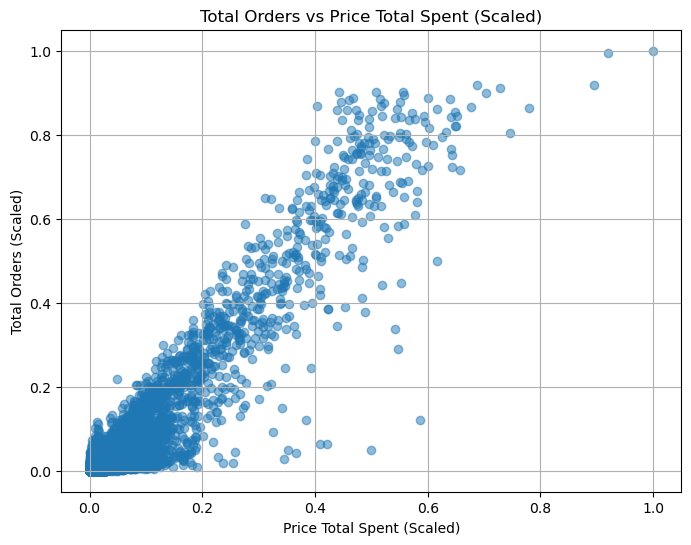

In [28]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Scaling the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(orders[['price_total_spent', 'total_orders']])
orders['price_total_spent_scaled'] = scaled_data[:, 0]
orders['total_orders_scaled'] = scaled_data[:, 1]

# Plotting the scaled data
plt.figure(figsize=(8, 6))
plt.scatter(orders['price_total_spent_scaled'], orders['total_orders_scaled'], alpha=0.5)
plt.title('Total Orders vs Price Total Spent (Scaled)')
plt.xlabel('Price Total Spent (Scaled)')
plt.ylabel('Total Orders (Scaled)')
plt.grid(True)
plt.show()


In [29]:
plt.savefig('graph.jpg', format='jpg')

<Figure size 640x480 with 0 Axes>

# CORRELATION ANALYSIS

In [30]:
selected_columns = ['price_total_spent', 'total_orders']
correlation_matrix = orders[selected_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   price_total_spent  total_orders
price_total_spent           1.000000      0.931138
total_orders                0.931138      1.000000


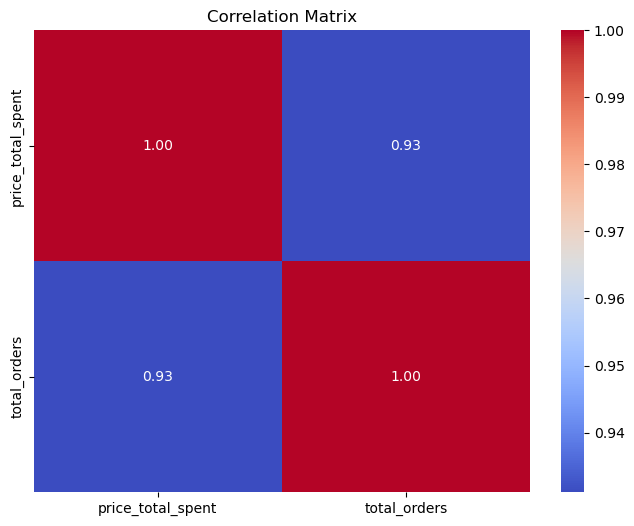

In [31]:
# Visualizing correlation matrix 
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# CACULATING RMF SCORE

# Scaling the features from 1 to 2 in order to calculate accurate priority scores

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['total_orders', 'price_total_spent']

data = orders[features]

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

scaled_data = (scaled_data + 1) / 2


# K Means Clustering
Finding the best value of k using Elbow-Method

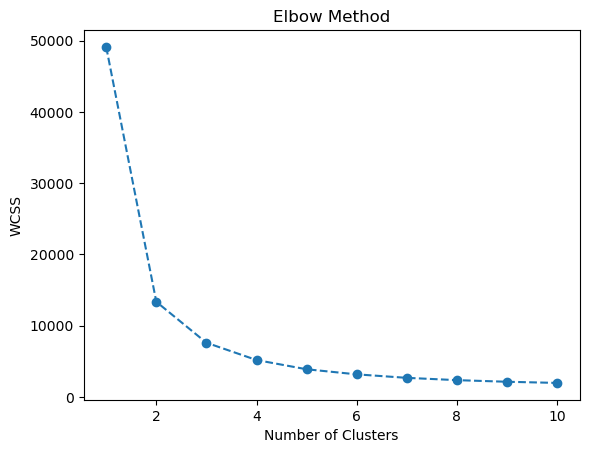

In [34]:
import warnings
warnings.filterwarnings('ignore')

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()


In [35]:
k = 3  #selecting clusters based on the elbow curve
# Perform K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
data['Cluster'] = clusters

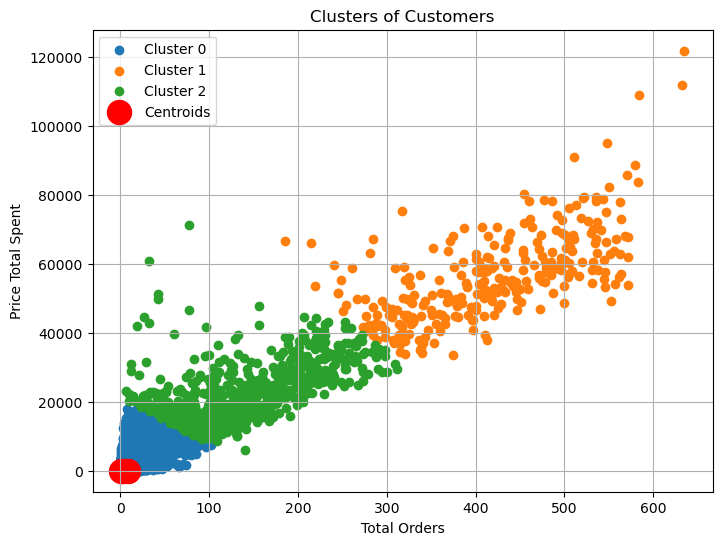

In [36]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['total_orders'], cluster_data['price_total_spent'], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Total Orders')
plt.ylabel('Price Total Spent')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
# Calculating cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Finding the cluster with the highest average values for total_orders and price_total_spent
cluster_with_highest_spending = centroids[:, 1].argmax()

# Printing cluster number and centroid values
print(f"Cluster with highest spending: {cluster_with_highest_spending}")
print(f"Centroid values for cluster {cluster_with_highest_spending}: {centroids[cluster_with_highest_spending]}")


Cluster with highest spending: 1
Centroid values for cluster 1: [  224.29797841 30678.73591681]


In [38]:
orders['Cluster'] = clusters

# Calculate cluster means
cluster_means = data.groupby('Cluster').mean()

# Display cluster means
print("Cluster Means:")
print(cluster_means)

Cluster Means:
         total_orders  price_total_spent
Cluster                                 
0            3.661002         893.577795
1          416.614035       56322.582632
2          138.559876       22506.468507


# Calculate priority scores

The priority score for ith row: <br>
P(i) = w(c)*(N(i) + S(i)) <br>
where, <br>
w(c)=weight assigned to the cluster <br>
N(i)=total orders of ith row/cluster mean of total orders <br>
S(i)=total spent of ith row/cluster mean of total spent <br>

In [39]:
import numpy as np
import pandas as pd

def calculate_priority_score(data, cluster_means, weights):
   
    priority_scores = []
    for index, row in data.iterrows():
        cluster = row['Cluster']
        total_orders = row['total_orders']
        price_total_spent = row['price_total_spent']
        cluster_mean_orders = cluster_means.loc[cluster, 'total_orders']
        cluster_mean_spent = cluster_means.loc[cluster, 'price_total_spent']
        weight = weights.get(cluster, 0)  # Get weight assigned to the cluster (default to 0 if not found)
        # Normalize values (assuming higher values are better)
        norm_orders = total_orders / cluster_mean_orders
        norm_spent = price_total_spent / cluster_mean_spent
        # Calculate priority score
        priority_score = weight * (norm_orders + norm_spent)
        priority_scores.append(priority_score)
    # Add priority scores to the DataFrame
    data['priority_score'] = priority_scores
    return pd.Series(priority_scores, index=data.index)


The updated weight for cluster c: <br>
w(c)' = w(c) + learning_rate * (P(i)-target)<br>


In [40]:
def update_weights(data, cluster_means, weights, learning_rate):
   
    priority_scores = calculate_priority_score(data, cluster_means, weights)
    # Calculating average priority score for each cluster
    cluster_scores = data.groupby('Cluster')['priority_score'].mean()
    # Updating weights based on the difference between cluster scores and the target values
    updated_weights = {}
    for cluster in weights:
        updated_weights[cluster] = weights[cluster] + learning_rate * (cluster_scores[cluster] - target_values[cluster])
    return updated_weights

# Defining initial weights
weights = {
    0: 0.8,
    1: 1.0,
    2: 0.9,
}

target_values = {
    0: 0.85,
    1: 0.9,
    2: 0.88,
}


In [41]:
learning_rate = 0.1
num_iterations=10

# Performing iterations of the feedback loop
for i in range(num_iterations):
    # Updating weights
    weights = update_weights(orders, cluster_means, weights, learning_rate)

# Calculating final priority scores
priority_scores = calculate_priority_score(orders, cluster_means, weights)

# Ranking customers by priority score
priority_ranking = priority_scores.sort_values(ascending=False)
print(priority_ranking)


29638    99.704968
30758    96.673155
31288    94.010258
89458    93.539071
52469    91.089480
           ...    
11269     0.750314
11848     0.750314
20157     0.750314
20024     0.750314
13506     0.750314
Length: 98262, dtype: float64
